In [1]:
%reset
import csv
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.ndimage import median_filter
import numpy as np
import pandas as pd
from scipy import signal
import statistics as stats
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
from scipy import stats

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
def weighted_average(distribution, weights):
    return round(sum([distribution[i]*weights[i] for i in range(len(distribution))])/sum(weights),2)

def import_csv(csvfilename):
    data = []
    with open(csvfilename, "r", encoding="utf-8", errors="ignore") as scraped:
        reader = csv.reader(scraped, delimiter=' ', skipinitialspace='True')
        next(reader)
        row_index = 0
        for row in reader:
            if row:  # avoid blank lines
                #row_index += 1
                #columns = [str(row_index), row[0], row[1], row[2], row[3]]
                #0-Time 1-Source 2-bdp 3-arr_in_bdp  4-AverageRttValue 5-pktsize 6-ratio/0.2 
                #7-CoV--CoVs.size () 8-occ_in_bdp_per_source 9-psi_mm1_per_source 
                #10-aggreg_occ_in_bdp 11-aggreg_psi_mm1
                columns = [row[0], row[1], row[2], row[3], row[4], 
                           row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12], row[13]]
                data.append(columns)

    return data

In [3]:
tcp_ccas = ([ 'TcpNewReno', 'TcpCubic', 'TcpVegas', 'TcpBbrV2', 'TcpModNewReno'])

In [4]:
data_in = {}

for algorithm in tcp_ccas:
    data_in[algorithm]={'time': list(), 'arrival_rate': list(), 'aggreg_arrival_rate': list(),
                                   'avRTT': list(), 'mu_psi': list(),
                                'occ_in_bdp_per_source': list(), 'mu_psi_mm1_per_source': list(),
                                'aggreg_occ_in_bdp': list(), 'aggreg_mu_psi_mm1': list(),
                                'response_time': list()}
    files = []
    files.append("ModNewReno-BW-effect/5-flows/10Mbps-100ms/" 
              + "1730p-btlqueue/" + algorithm + "-5-flows-10Mbps-100ms-"
              + "1730p-InFlight.dat")
    print(algorithm)
        
    for file_name in files:
        raw_data = import_csv(file_name);
        for row in raw_data:
                data_in[algorithm]['time'].append(pd.DataFrame({row[0]}).astype(float))
                data_in[algorithm]['arrival_rate'].append(pd.DataFrame({row[3]}).astype(float))
                data_in[algorithm]['aggreg_arrival_rate'].append(pd.DataFrame({row[4]}).astype(float))
                data_in[algorithm]['avRTT'].append(pd.DataFrame({row[5]}).astype(float))
                data_in[algorithm]['mu_psi'].append(pd.DataFrame({row[7]}).astype(float))
                data_in[algorithm]['occ_in_bdp_per_source'].append(pd.DataFrame({row[9]}).astype(float))
                data_in[algorithm]['mu_psi_mm1_per_source'].append(pd.DataFrame({row[10]}).astype(float))
                data_in[algorithm]['aggreg_occ_in_bdp'].append(pd.DataFrame({row[11]}).astype(float))
                data_in[algorithm]['aggreg_mu_psi_mm1'].append(pd.DataFrame({row[12]}).astype(float))
                #print(row[3], row[11])


TcpNewReno
TcpCubic
TcpVegas
TcpBbrV2
TcpModNewReno


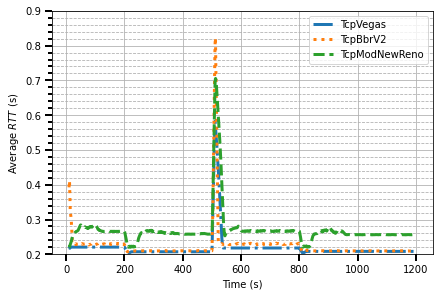

In [5]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(
        data_in[tcp_ccas[2]]['time'], pd.DataFrame(data_in[tcp_ccas[2]]['avRTT']).
                                            rolling(window=50, win_type=None).mean(), '-.',
        data_in[tcp_ccas[3]]['time'], pd.DataFrame(data_in[tcp_ccas[3]]['avRTT']).
                                            rolling(window=50, win_type=None).mean(), ':',
        data_in[tcp_ccas[4]]['time'], pd.DataFrame(data_in[tcp_ccas[4]]['avRTT']).
                                            rolling(window=50, win_type=None).mean(), '--', linewidth=3
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Average $RTT$ (s)')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0.2,0.9)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([
            tcp_ccas[2], tcp_ccas[3], tcp_ccas[4]
           ])
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('avRTT_time_series_delay.png', transparent=True)

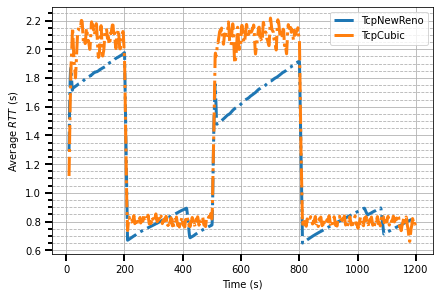

In [6]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(
        data_in[tcp_ccas[0]]['time'], pd.DataFrame(data_in[tcp_ccas[0]]['avRTT']).
                                            rolling(window=50, win_type=None).mean(), '-.',
        data_in[tcp_ccas[1]]['time'], pd.DataFrame(data_in[tcp_ccas[1]]['avRTT']).
                                            rolling(window=50, win_type=None).mean(), '-.', linewidth=3
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Average $RTT$ (s)')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,2)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([
            tcp_ccas[0], tcp_ccas[1]
           ])
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('avRTT_time_series_loss.png', transparent=True)

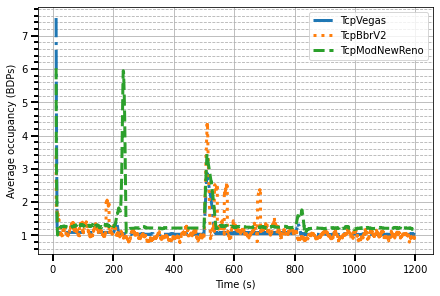

In [7]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(
        data_in[tcp_ccas[2]]['time'], pd.DataFrame(data_in[tcp_ccas[2]]['aggreg_occ_in_bdp']).
                                            rolling(window=50, win_type=None).mean(), '-.',
        data_in[tcp_ccas[3]]['time'], pd.DataFrame(data_in[tcp_ccas[3]]['aggreg_occ_in_bdp']).
                                            rolling(window=50, win_type=None).mean(), ':',
        data_in[tcp_ccas[4]]['time'], pd.DataFrame(data_in[tcp_ccas[4]]['aggreg_occ_in_bdp']).
                                            rolling(window=50, win_type=None).mean(), '--', linewidth=3
        )
#df2=df.rolling(window=3, win_type='gaussian').mean(std=3)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Average occupancy (BDPs)')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
#plt.ylim(0,10)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([
            tcp_ccas[2], tcp_ccas[3], tcp_ccas[4]
           ])
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('aggreg_occ_time_series_delay.png', transparent=True)

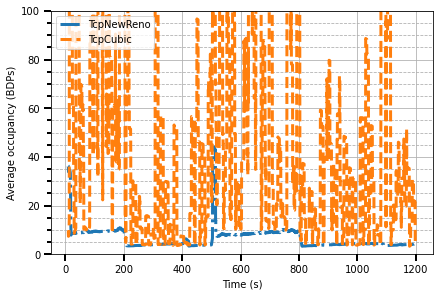

In [8]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(
        data_in[tcp_ccas[0]]['time'], pd.DataFrame(data_in[tcp_ccas[0]]['aggreg_occ_in_bdp']).
                                            rolling(window=50, win_type=None).mean(), '-.',
        data_in[tcp_ccas[1]]['time'], pd.DataFrame(data_in[tcp_ccas[1]]['aggreg_occ_in_bdp']).
                                            rolling(window=50, win_type=None).mean(), '--', linewidth=3
        )
#df2=df.rolling(window=3, win_type='gaussian').mean(std=3)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Average occupancy (BDPs)')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0,100)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([
            tcp_ccas[0], tcp_ccas[1]
           ])
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('aggreg_occ_time_series_loss.png', transparent=True)

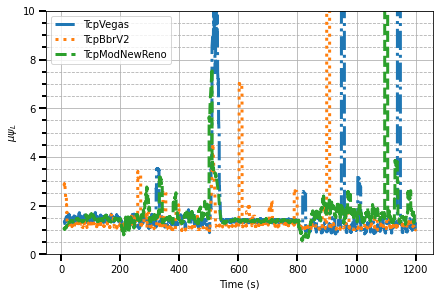

In [9]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(
        data_in[tcp_ccas[2]]['time'], pd.DataFrame(data_in[tcp_ccas[2]]['mu_psi']).
                                            rolling(window=50, win_type=None).mean(), '-.',
        data_in[tcp_ccas[3]]['time'], pd.DataFrame(data_in[tcp_ccas[3]]['mu_psi']).
                                            rolling(window=50, win_type=None).mean(), ':',
        data_in[tcp_ccas[4]]['time'], pd.DataFrame(data_in[tcp_ccas[4]]['mu_psi']).
                                            rolling(window=50, win_type=None).mean(), '--', linewidth=3
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (s)')
plt.ylabel(r'$\mu \psi_L$')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0,10)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([
            tcp_ccas[2], tcp_ccas[3], tcp_ccas[4]
           ])
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('mupsi_time_series_delay.png', transparent=True)

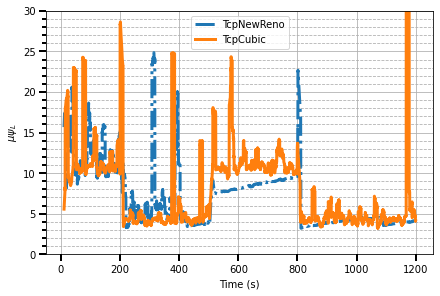

In [10]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.plot(
        data_in[tcp_ccas[0]]['time'], pd.DataFrame(data_in[tcp_ccas[0]]['mu_psi']).
                                            rolling(window=50, win_type=None).mean(), '-.',
        data_in[tcp_ccas[1]]['time'], pd.DataFrame(data_in[tcp_ccas[1]]['mu_psi']).
                                            rolling(window=50, win_type=None).mean(), '-', linewidth=3
        )

ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.grid(b=True, which='minor', linestyle='--')

plt.xlabel(r'Time (s)')
plt.ylabel(r'$\mu \psi_L$')
#plt.xscale('log')
#x = [0.0058, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6, 10]
#values = ['0.0', '0.05', '0.1', '0.2', '0.5', '1', '2', '4', '6', '10']
#plt.xticks(x,values)
#plt.yscale('log')
plt.ylim(0,30)
#plt.xlim(0.0001,10)
plt.grid(True)
plt.legend([
            tcp_ccas[0], tcp_ccas[1]
           ])
plt.show
#tikplt.save("rho_vs_L2_mx1.tex")
plt.savefig('mupsi_time_series_loss.png', transparent=True)